In [6]:
#导入warning包，利用过滤器来实现忽略警告语句
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
#载入数据
##1.载入训练集合测试集
train_data = pd.read_csv('E:\\data\\二手车\\used_car_train_20200313.csv',sep=' ',engine='python')
test_data = pd.read_csv('E:\\data\\二手车\\used_car_testA_20200313.csv',sep=' ',engine='python')


In [8]:
##2.简略观察数据（head()+shape）
print(train_data.head().append(train_data.tail()))

        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0            0     736  20040402   30.0      6       1.0       0.0      0.0   
1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        power  kilometer    ...          v_5       v_6       v_7       v_8  \
0          60       12.5    ...     0.235676  0.1019

In [9]:
print(train_data.shape)

(150000, 31)


In [10]:
print(test_data.head().append(test_data.tail()))
print(test_data.shape)

       SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0      150000   66932  20111212  222.0      4       5.0       1.0      1.0   
1      150001  174960  19990211   19.0     21       0.0       0.0      0.0   
2      150002    5356  20090304   82.0     21       0.0       0.0      0.0   
3      150003   50688  20100405    0.0      0       0.0       0.0      1.0   
4      150004  161428  19970703   26.0     14       2.0       0.0      0.0   
49995  199995   20903  19960503    4.0      4       4.0       0.0      0.0   
49996  199996     708  19991011    0.0      0       0.0       0.0      0.0   
49997  199997    6693  20040412   49.0      1       0.0       1.0      1.0   
49998  199998   96900  20020008   27.0      1       0.0       0.0      1.0   
49999  199999  193384  20041109  166.0      6       1.0       NaN      1.0   

       power  kilometer    ...          v_5       v_6       v_7       v_8  \
0        313       15.0    ...     0.264405  0.121800  0.070899 

In [11]:
#总览数据概况
#1.通过discribe()来熟悉数据的相关统计量
print(train_data.describe())

              SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       

In [12]:
print(test_data.describe())

              SaleID           name       regDate         model         brand  \
count   50000.000000   50000.000000  5.000000e+04  50000.000000  50000.000000   
mean   174999.500000   68542.223280  2.003393e+07     46.844520      8.056240   
std     14433.901067   61052.808133  5.368870e+04     49.469548      7.819477   
min    150000.000000       0.000000  1.991000e+07      0.000000      0.000000   
25%    162499.750000   11203.500000  1.999091e+07     10.000000      1.000000   
50%    174999.500000   52248.500000  2.003091e+07     29.000000      6.000000   
75%    187499.250000  118856.500000  2.007110e+07     65.000000     13.000000   
max    199999.000000  196805.000000  2.015121e+07    246.000000     39.000000   

           bodyType      fuelType       gearbox         power     kilometer  \
count  48587.000000  47107.000000  48090.000000  50000.000000  50000.000000   
mean       1.782185      0.373405      0.224350    119.883620     12.595580   
std        1.760736      0.546442

In [13]:
#2.通过info()来熟悉数据类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [15]:
#判断数据缺失和异常
##1.查看每列的存在nan情况
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [16]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

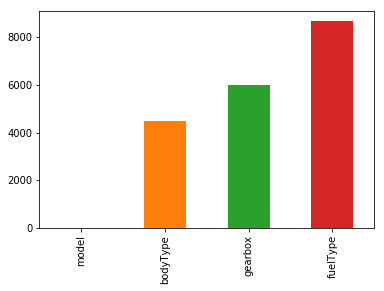

In [18]:
##nan可视化
missing=train_data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

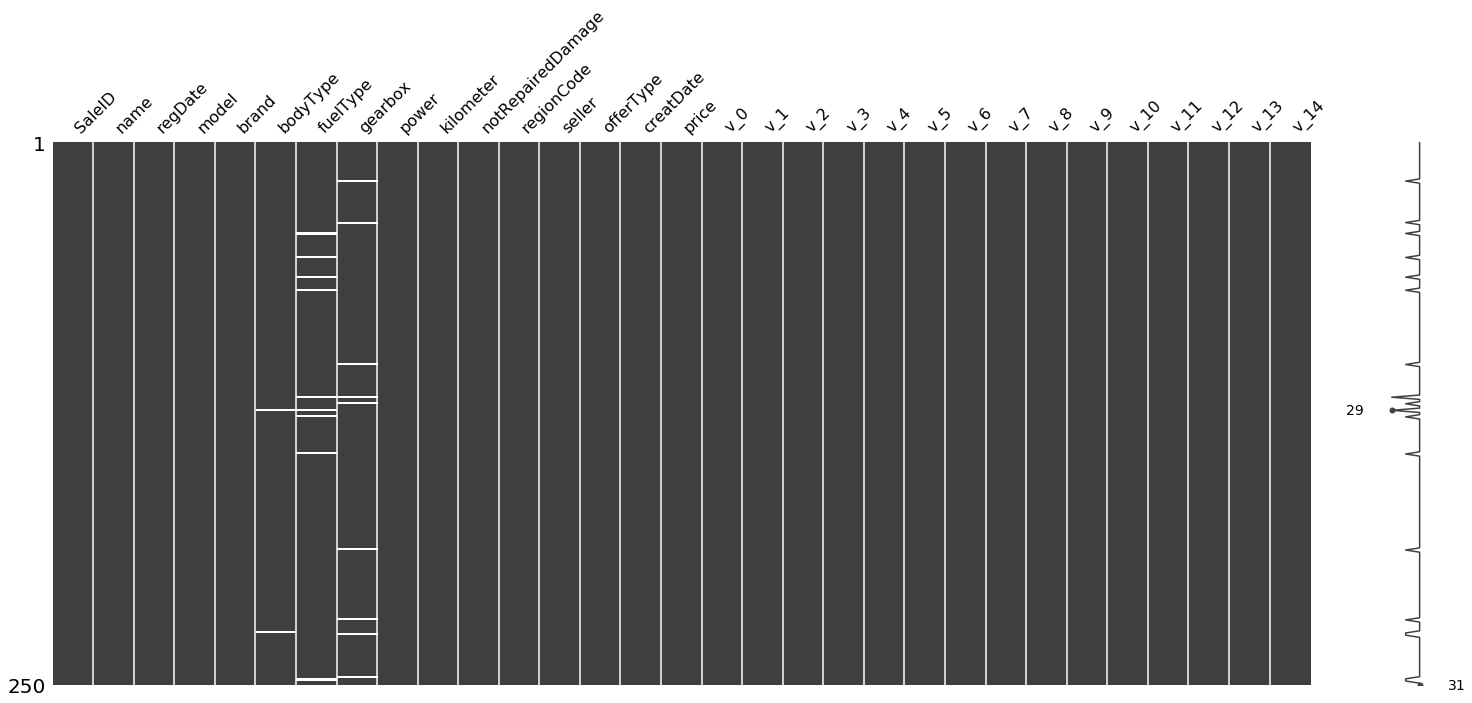

In [19]:
## 可视化看下缺省值
msno.matrix(train_data.sample(250))

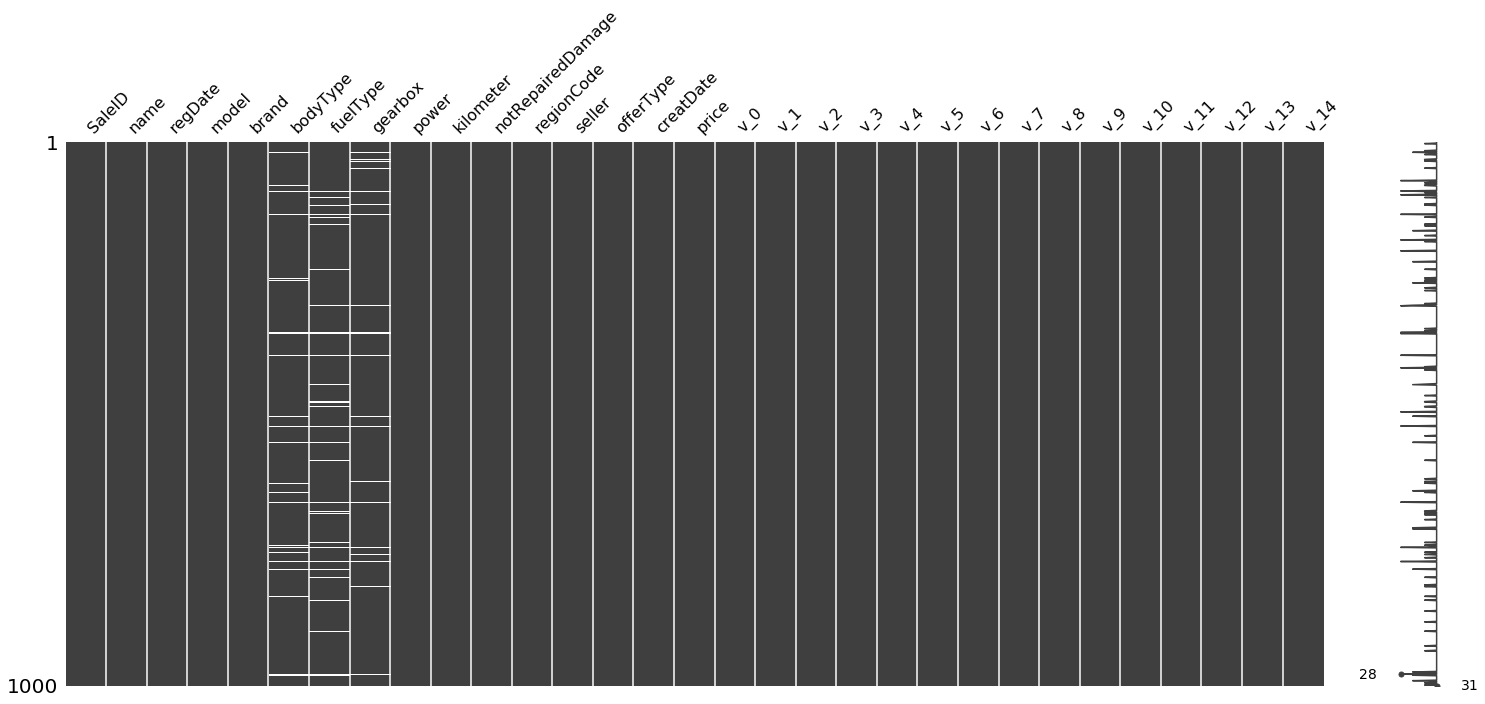

In [20]:
msno.matrix(train_data.sample(1000))

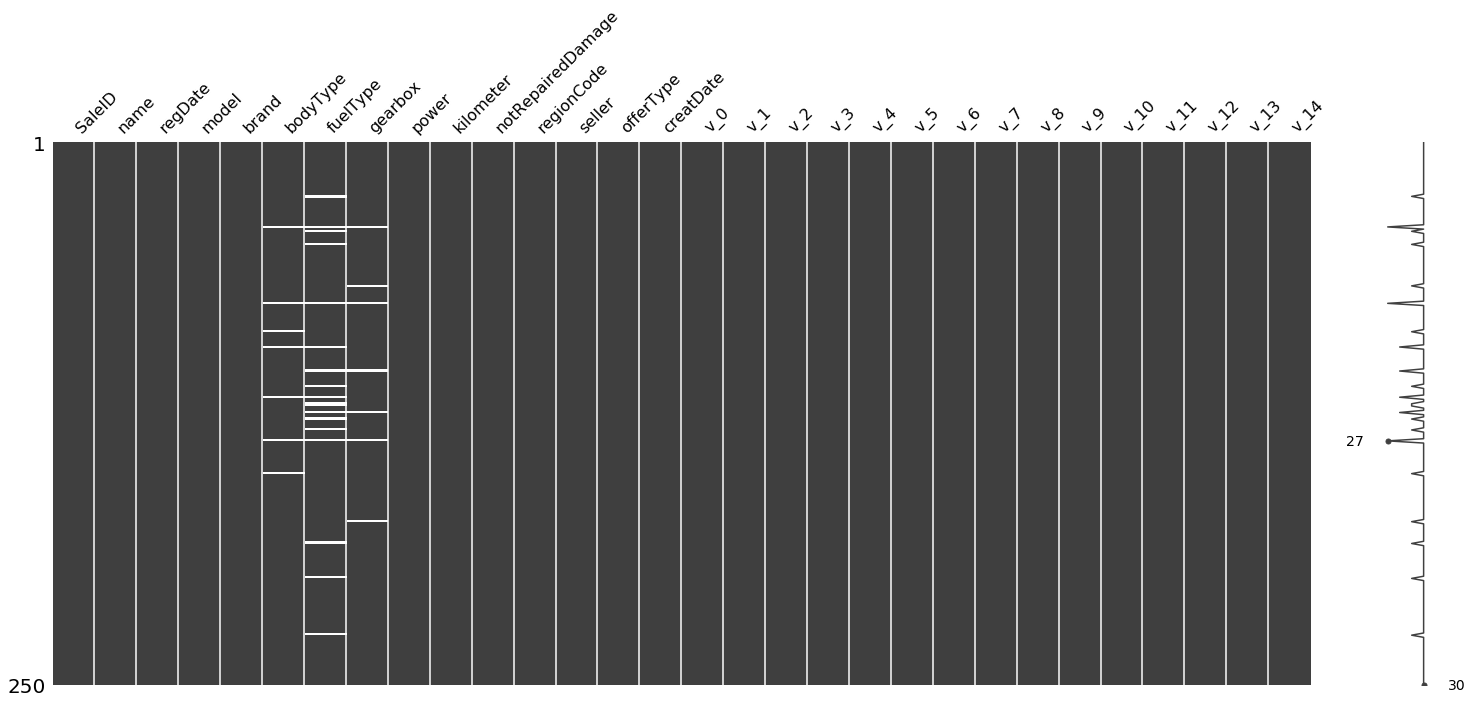

In [17]:
msno.matrix(test_data.sample(250))

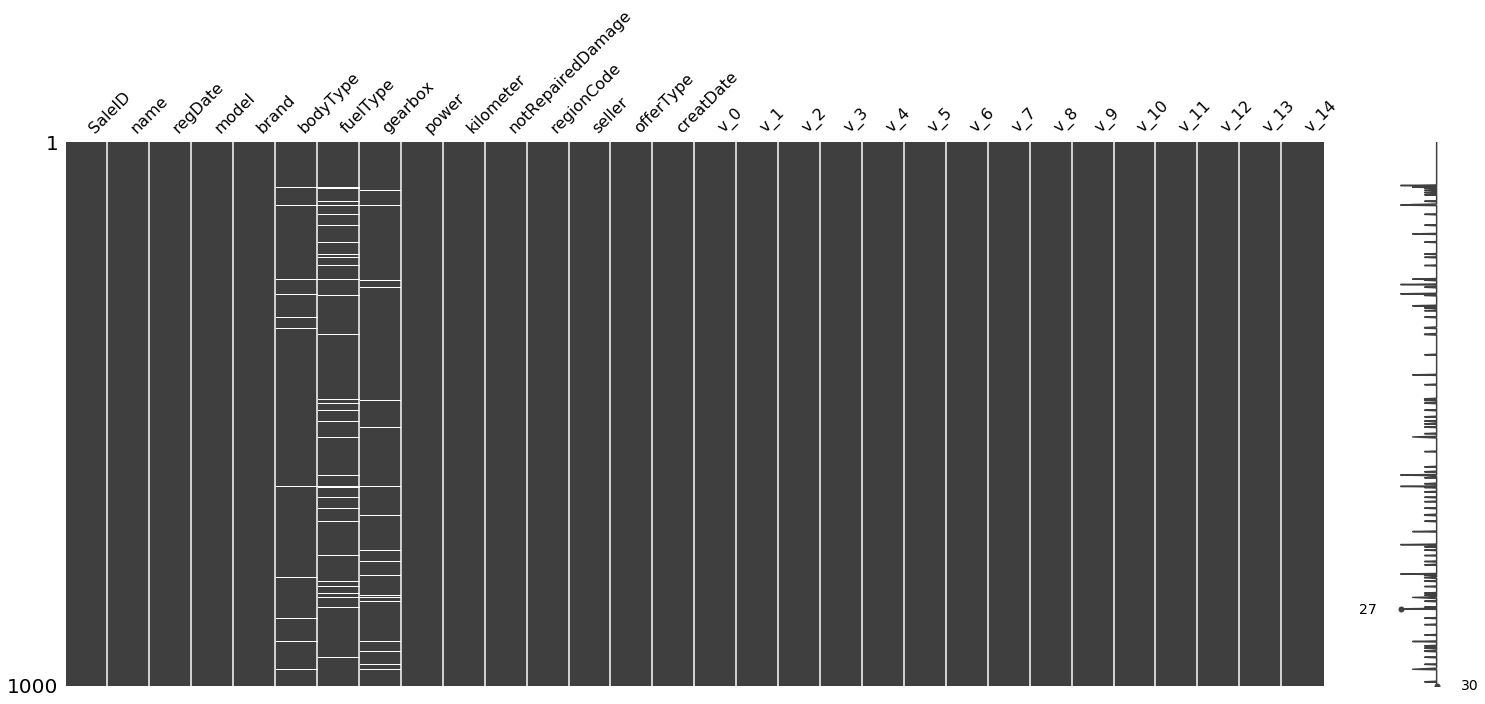

In [21]:
msno.matrix(test_data.sample(1000))

In [22]:
##2.查看异常值检测
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [23]:
#notRepairedDamage列的值进行展示
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [24]:
#将-用nan进行替代，很多模型中对nan有直接的处理
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [25]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [26]:
test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [27]:
test_data['notRepairedDamage'].replace('-',np.nan,inplace=True)
test_data['notRepairedDamage'].value_counts()

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

In [28]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [29]:
#以下两个类别数值严重倾斜，先删除
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [30]:
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [31]:
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

In [32]:
#了解预测值price的分布
train_data['price']

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [33]:
train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

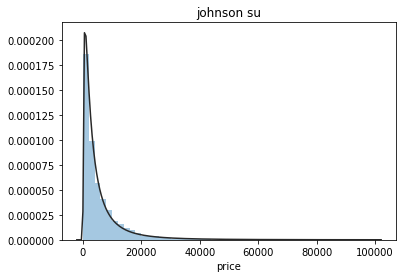

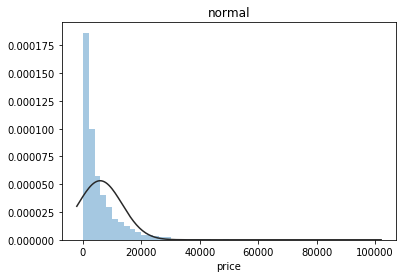

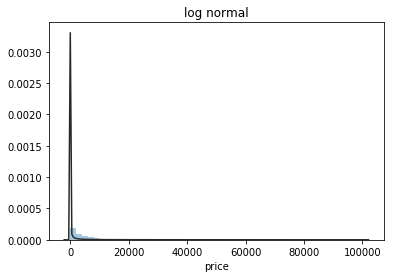

In [34]:
##1.总体分布情况（无界约翰逊分布）
import scipy.stats as st
y=train_data['price']
plt.figure(1);plt.title('johnson su')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);plt.title('log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

skewness:3.346487
kurtosis:18.995183


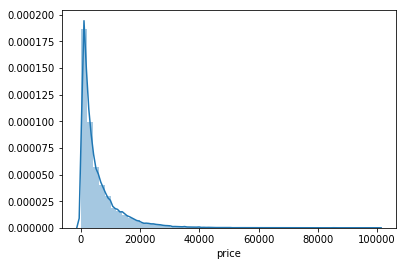

In [35]:
##2.查看skewness and kurtosis(偏度和峰度)
sns.distplot(train_data['price'])
print('skewness:%f' % train_data['price'].skew())
print('kurtosis:%f' % train_data['price'].kurt())

In [36]:
train_data.skew(),train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

In [41]:
#sns.distplot(train_data.skew(),color='bule',axlabel='skewness')
#sns.distplot(train_data.Kurt(),color='orange',axlabel='kurtness')

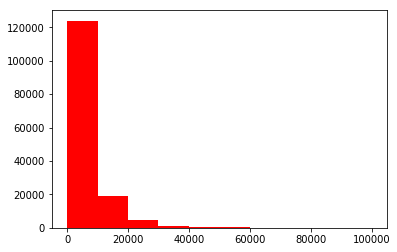

In [42]:
##3.查看预测值的具体频数
plt.hist(train_data['price'],orientation='vertical',histtype='bar',color='red')
plt.show()

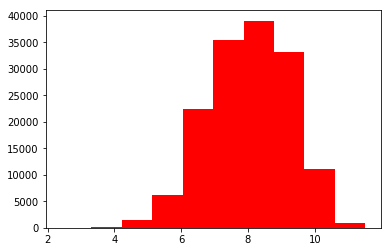

In [43]:
#log 变换z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题的常用trick
plt.hist(np.log(train_data['price']),orientation='vertical',histtype='bar',color='red')
plt.show()

In [44]:
# 分离label 即预测值
y_train=train_data['price']

In [45]:
#这个区别方式适用于没有直接label coding的数据
#这里不适用 需要人为根据实际含义来区分
#数字特征
#numeric_features=train_data.select_dtypes(include=[np.number])
#numeric_features.columns
##类型特征
#categorical_features=train_data.select_dtypes(include=[np.object])
#categorical_features.columns

In [47]:
numeric_fratures=['power','kilometer','v_0','v_1','v_2','v_3','v_4','v_5','v_6',
                  'v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']
categorical_features=['name','model','brand','bodyType','fuelType','gearbox',
                      'notRepairedDamage','regionCode']

In [48]:
#特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea +'的特征分布如下：')
    print('{}特征有个{}不同的值。'.format(cat_fea,train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值。
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值。
0.0      11762
19.0      9573
4.0       84

0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64
fuelType的特征分布如下：
fuelType特征有个7不同的值。
0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64
gearbox的特征分布如下：
gearbox特征有个2不同的值。
0.0    111623
1.0     32396
Name: gearbox, dtype: int64
notRepairedDamage的特征分布如下：
notRepairedDamage特征有个2不同的值。


0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64
regionCode的特征分布如下：
regionCode特征有个7905不同的值。
419     369
764     258
125     137
176     136
462     134
428     132
24      130
1184    130
122     129
828     126
70      125
827     120
207     118
1222    117
2418    117
85      116
2615    115
2222    113
759     112
188     111
1757    110
1157    109
2401    107
1069    107
3545    107
424     107
272     107
451     106
450     105
129     105
       ... 
6324      1
7372      1
7500      1
8107      1
2453      1
7942      1
5135      1
6760      1
8070      1
7220      1
8041      1
8012      1
5965      1
823       1
7401      1
8106      1
5224      1
8117      1
7507      1
7989      1
6505      1
6377      1
8042      1
7763      1
7786      1
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64


In [49]:
for cat_fea in categorical_features:
    print(cat_fea +'的特征分布如下：')
    print('{}特征有个{}不同的值。'.format(cat_fea,test_data[cat_fea].nunique()))
    print(test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值。
55        97
708       96
387       95
1541      88
713       74
53        72
1186      67
203       67
631       65
911       64
2044      62
2866      60
1139      57
893       54
1180      52
2765      50
1108      50
290       48
1513      47
691       45
473       44
299       43
444       41
422       39
964       39
1479      38
1273      38
306       36
725       35
4635      35
          ..
46786      1
48835      1
165572     1
68204      1
171719     1
59080      1
186062     1
11985      1
147155     1
134869     1
138967     1
173792     1
114403     1
59098      1
59144      1
40679      1
61161      1
128746     1
55022      1
143089     1
14066      1
147187     1
112892     1
46598      1
159481     1
22270      1
89855      1
42752      1
48899      1
11808      1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值。
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
48.0     1685
26.0     1525
40.0 


0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64
regionCode的特征分布如下：
regionCode特征有个6971不同的值。
419     146
764      78
188      52
125      51
759      51
2615     50
462      49
542      44
85       44
1069     43
451      41
828      40
757      39
1688     39
2154     39
1947     39
24       39
2690     38
238      38
2418     38
827      38
1184     38
272      38
233      38
70       37
703      37
2067     37
509      37
360      37
176      37
       ... 
5512      1
7465      1
1290      1
3717      1
1258      1
7401      1
7920      1
7925      1
5151      1
7527      1
7689      1
8114      1
3237      1
6003      1
7335      1
3984      1
7367      1
6001      1
8021      1
3691      1
4920      1
6035      1
3333      1
5382      1
6969      1
7753      1
7463      1
7230      1
826       1
112       1
Name: regionCode, Length: 6971, dtype: int64


In [50]:
#数字特征分析
numeric_fratures.append('price')
numeric_fratures

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [52]:
print(train_data.head())

   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer    ...          v_5       v_6       v_7       v_8       v_9  \
0       12.5    ...     0.235676  0.101988  0.129549  0.022816  0.097462   
1       15.0    ...     0.264777  0.121004  0.135731  0.026597  0.020582   
2       12.5    ...     0.251410  0.114912  0.165147  0.062173  0.027075   
3       15.0    ...     0.274293  0.110300  0.121964  0.033395  0.000000   
4        5.0    ...     0.228036  0.073205  0.091880  0.078819  0.121534   

       v_10      v_11      v_12      v_13      v_14  
0 

In [54]:
##1.相关性分析
price_numeric=train_data[numeric_fratures]
correlation=price_numeric.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



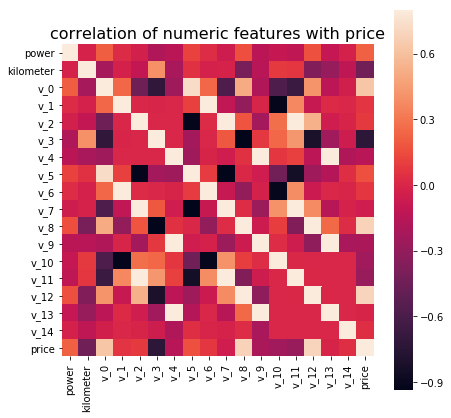

In [55]:
f,ax=plt.subplots(figsize=(7,7))
plt.title('correlation of numeric features with price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [56]:
del price_numeric['price']

In [57]:
##2.查看几个特征的偏度和峰度
for col in numeric_fratures:
    print('{:15}'.format(col),
          'skewness:{:05.5f}'.format(train_data[col].skew()),
          ' ',
          'kurtosis:{:06.2f}'.format(train_data[col].kurt())
          )

power           skewness:65.86318   kurtosis:5733.45
kilometer       skewness:-1.52592   kurtosis:001.14
v_0             skewness:-1.31671   kurtosis:003.99
v_1             skewness:0.35945   kurtosis:-01.75
v_2             skewness:4.84256   kurtosis:023.86
v_3             skewness:0.10629   kurtosis:-00.42


v_4             skewness:0.36799   kurtosis:-00.20
v_5             skewness:-4.73709   kurtosis:022.93
v_6             skewness:0.36807   kurtosis:-01.74
v_7             skewness:5.13023   kurtosis:025.85
v_8            

 skewness:0.20461   kurtosis:-00.64
v_9             skewness:0.41950   kurtosis:-00.32
v_10            skewness:0.02522   kurtosis:-00.58
v_11            skewness:3.02915   kurtosis:012.57
v_12            skewness:0.36536   kurtosis:000.27


v_13            skewness:0.26792   kurtosis:-00.44
v_14            skewness:-1.18636   kurtosis:002.39
price           skewness:3.34649   kurtosis:019.00


In [61]:
##3.每个数字特征的分布可视化
f=pd.melt(train_data,value_vars=numeric_fratures)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')


In [63]:
##4.数字特征相互之间的关系可视化
sns.set()
columns=['price','v_12','v_8','power','v_5','v_2','v_6','v_1','v_14','v_13',
         'v_7','v_4','v_9','v_10','v_11','kilometer','v_3']
sns.pairplot(train_data[columns],size=2,kind='scatter',diag_kind='kde')
plt.show()

In [64]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [65]:
y_train

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [66]:
##5.多变量互相回归关系可视化
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplot(nrows=5,ncols=2)

v_12_scatter_plot=pd.concat([y_train,train_data['v_12']],axis=1)
sns.regplot(x='v_12',y='price',data=v_12_scatter_plot,scatter=True,fit_reg=True,ax=ax1)

v_8_scatter_plot=pd.concat([y_train,train_data['v_8']],axis=1)
sns.regplot(x='v_8',y='price',data=v_8_scatter_plot,scatter=True,fit_reg=True,ax=ax2)

v_0_scatter_plot=pd.concat([y_train,train_data['v_0']],axis=1)
sns.regplot(x='v_0',y='price',data=v_0_scatter_plot,scatter=True,fit_reg=True,ax=ax3)

power_scatter_plot=pd.concat([y_train,train_data['power']],axis=1)
sns.regplot(x='power',y='price',data=power_scatter_plot,scatter=True,fit_reg=True,ax=ax4)

v_5_scatter_plot=pd.concat([y_train,train_data['v_5']],axis=1)
sns.regplot(x='v_5',y='price',data=v_5_scatter_plot,scatter=True,fit_reg=True,ax=ax5)

v_2_scatter_plot=pd.concat([y_train,train_data['v_2']],axis=1)
sns.regplot(x='v_2',y='price',data=v_2_scatter_plot,scatter=True,fit_reg=True,ax=ax6)

v_6_scatter_plot=pd.concat([y_train,train_data['v_6']],axis=1)
sns.regplot(x='v_6',y='price',data=v_6_scatter_plot,scatter=True,fit_reg=True,ax=ax7)

v_1_scatter_plot=pd.concat([y_train,train_data['v_1']],axis=1)
sns.regplot(x='v_1',y='price',data=v_1_scatter_plot,scatter=True,fit_reg=True,ax=ax8)

v_14_scatter_plot=pd.concat([y_train,train_data['v_14']],axis=1)
sns.regplot(x='v_14',y='price',data=v_14_scatter_plot,scatter=True,fit_reg=True,ax=ax9)

v_13_scatter_plot=pd.concat([y_train,train_data['v_13']],axis=1)
sns.regplot(x='v_13',y='price',data=v_13_scatter_plot,scatter=True,fit_reg=True,ax=ax10)


In [68]:
##1.unique分布
for fea in categorical_features:
    print(train_data[fea].nunique())

99662
248


40
8
7
2


2
7905


In [69]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [75]:
##2.类别特征箱型图可视化
#因为name和regionCode的类别太稀疏，这里就把不稀疏的几类画出来
categorical_features=['model','brand','bodyType','fuelType',
                      'gearbox','notRepairedDamage']
for c in categorical_features:
    train_data[c]=train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c]=train_data[c].cat.add_categories(['MISSING'])
        train_data[c]=train_data[c].fillna('MISSING')
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,'value','price')

In [76]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [77]:
##3.类别特征的小提琴图可视化
catg_list=categorical_features
target='price'
for catg in cat_fea:
    sns.violinplot(x=catg,y=target,data=train_data)
    plt.show()

ValueError: Could not interpret input 'r'

In [78]:
categorical_features=['model','brand','bodyType','gearbox','notRepairedDamage']


In [79]:
##4.类别特征的柱形图可视化
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f-pd.melt(train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(bar_plot,'value','price')

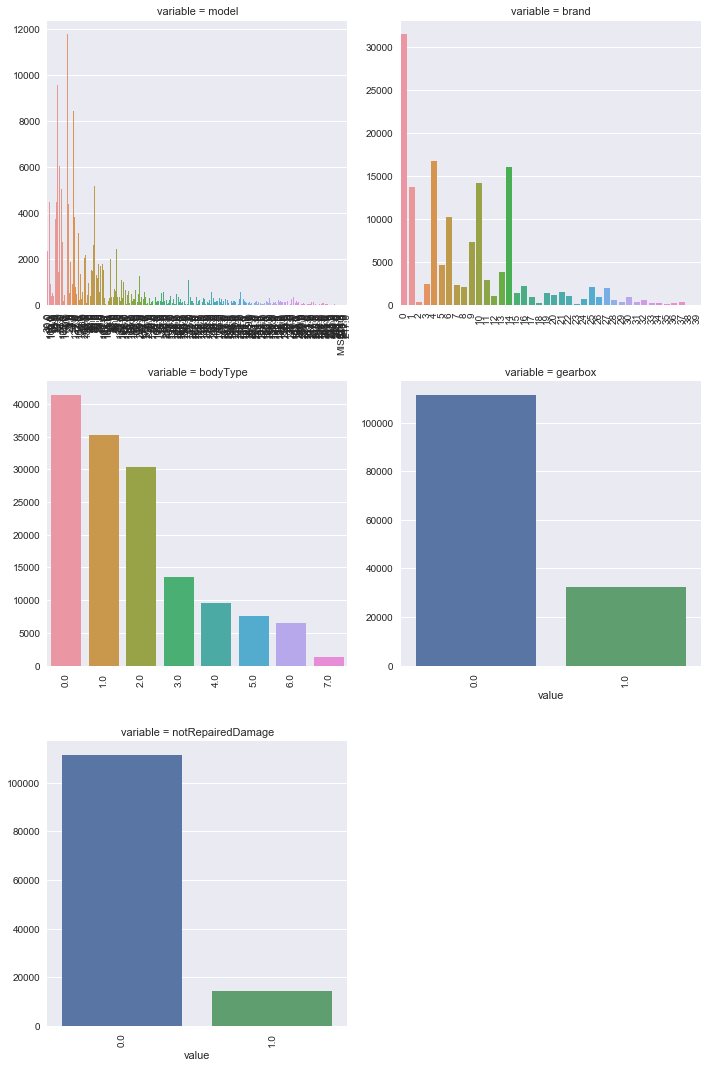

In [80]:
##5.类别特征的每个类别频数可视化（count_plot）
def count_plot(x,**kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
f=pd.melt(train_data,value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(count_plot,'value')